<a href="https://colab.research.google.com/github/venkateshchandle/bis/blob/main/Genetic_algorithm_tsp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generation 1/500, Best Distance: 304.0749978398393
Generation 2/500, Best Distance: 304.0749978398393
Generation 3/500, Best Distance: 304.0749978398393
Generation 4/500, Best Distance: 304.0749978398393
Generation 5/500, Best Distance: 274.00849312346725
Generation 6/500, Best Distance: 274.00849312346725
Generation 7/500, Best Distance: 274.00849312346725
Generation 8/500, Best Distance: 274.00849312346725
Generation 9/500, Best Distance: 264.5423226062531
Generation 10/500, Best Distance: 264.5423226062531
Generation 11/500, Best Distance: 264.5423226062531
Generation 12/500, Best Distance: 264.5423226062531
Generation 13/500, Best Distance: 264.54232260625304
Generation 14/500, Best Distance: 264.54232260625304
Generation 15/500, Best Distance: 264.54232260625304
Generation 16/500, Best Distance: 264.54232260625304
Generation 17/500, Best Distance: 264.54232260625304
Generation 18/500, Best Distance: 264.54232260625304
Generation 19/500, Best Distance: 264.54232260625304
Generation

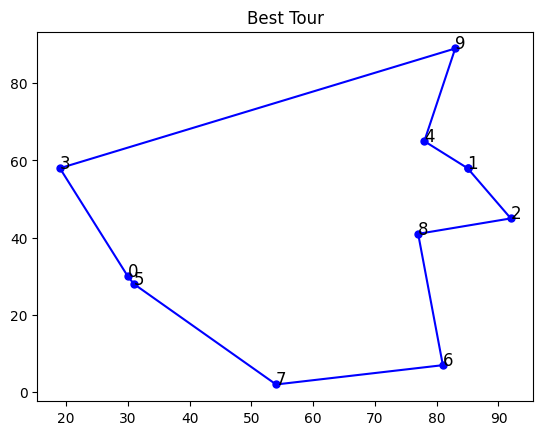

In [1]:
import numpy as np
import random
import math

def generate_cities(num_cities):
    return [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_cities)]

def calculate_distance(city1, city2):
    return math.sqrt((city1[0] - city2[0])**2 + (city1[1] - city2[1])**2)

def calculate_total_distance(tour, cities):
    total_distance = 0
    for i in range(len(tour) - 1):
        total_distance += calculate_distance(cities[tour[i]], cities[tour[i + 1]])
    total_distance += calculate_distance(cities[tour[-1]], cities[tour[0]])
    return total_distance

def generate_population(pop_size, num_cities):
    population = []
    for _ in range(pop_size):
        tour = list(range(num_cities))
        random.shuffle(tour)
        population.append(tour)
    return population

def tournament_selection(population, cities, tournament_size=3):
    tournament = random.sample(population, tournament_size)
    tournament.sort(key=lambda tour: calculate_total_distance(tour, cities))
    return tournament[0]

def crossover(parent1, parent2):
    size = len(parent1)
    start, end = sorted(random.sample(range(size), 2))

    child = [-1] * size
    child[start:end] = parent1[start:end]

    current_pos = 0
    for i in range(size):
        if child[i] == -1:
            while parent2[current_pos] in child:
                current_pos += 1
            child[i] = parent2[current_pos]
    return child

def mutate(tour, mutation_rate=0.01):
    if random.random() < mutation_rate:
        i, j = random.sample(range(len(tour)), 2)
        tour[i], tour[j] = tour[j], tour[i]
    return tour

def genetic_algorithm(num_cities, pop_size=100, generations=500, mutation_rate=0.01):
    cities = generate_cities(num_cities)
    population = generate_population(pop_size, num_cities)

    best_tour = None
    best_distance = float('inf')

    for gen in range(generations):
        new_population = []

        for _ in range(pop_size):
            parent1 = tournament_selection(population, cities)
            parent2 = tournament_selection(population, cities)

            child = crossover(parent1, parent2)
            mutated_child = mutate(child, mutation_rate)
            new_population.append(mutated_child)

        population = new_population

        for tour in population:
            total_distance = calculate_total_distance(tour, cities)
            if total_distance < best_distance:
                best_distance = total_distance
                best_tour = tour

        print(f"Generation {gen + 1}/{generations}, Best Distance: {best_distance}")

    return best_tour, best_distance, cities

import matplotlib.pyplot as plt

def plot_solution(tour, cities):
    x = [cities[i][0] for i in tour] + [cities[tour[0]][0]]
    y = [cities[i][1] for i in tour] + [cities[tour[0]][1]]

    plt.plot(x, y, 'bo-', markersize=5)
    for i, city in enumerate(cities):
        plt.text(city[0], city[1], str(i), fontsize=12)
    plt.title("Best Tour")
    plt.show()

if __name__ == "__main__":
    num_cities = 10
    best_tour, best_distance, cities = genetic_algorithm(num_cities)

    print("Best tour:", best_tour)
    print("Best distance:", best_distance)

    plot_solution(best_tour, cities)
